In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from label_flip_revised.utils import create_dir

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/diva_01


In [3]:
path_output = os.path.join(PATH_ROOT, 'results_plot')
print(path_output)
create_dir(path_output)

/home/lukec/workspace/diva_01/results_plot


In [4]:
df_falfa_01 = pd.read_csv(os.path.join(PATH_ROOT, 'results', 'real', 'real_falfa_nn_db.csv'))
print(df_falfa_01.shape)
df_falfa_01.head()

(90, 38)


,Data,F1,F1 SD,F1v,F2,F3,F4,N1,N2,N2 SD,...,Hubs SD,Path.Train,Path.Poison,Path.Test,Rate,Train.Clean,Test.Clean,Train.Poison,Test.Poison,Data.Base
0,breastcancer_std_falfa_nn_0.00.csv,0.712464,0.215349,0.066235,6.264744e-11,0.485714,0.000000,0.074725,0.366983,0.074135,...,0.225796,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.00,0.986813,0.982456,0.986813,0.982456,breastcancer_std
1,breastcancer_std_falfa_nn_0.05.csv,0.859098,0.101038,0.133480,1.440449e-06,0.696703,0.000000,0.103297,0.382469,0.070786,...,0.283660,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.05,0.986813,0.982456,0.982418,0.956140,breastcancer_std
2,breastcancer_std_falfa_nn_0.10.csv,0.844907,0.108064,0.240749,2.910036e-09,0.753846,0.316484,0.191209,0.409176,0.076152,...,0.225717,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.10,0.986813,0.982456,0.964835,0.868421,breastcancer_std
3,breastcancer_std_falfa_nn_0.15.csv,0.948572,0.034941,0.258380,2.631059e-06,0.712088,0.048352,0.153846,0.396442,0.077667,...,0.181392,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.15,0.986813,0.982456,0.984615,0.824561,breastcancer_std
4,breastcancer_std_falfa_nn_0.20.csv,0.919837,0.052507,0.311281,6.912120e-10,0.723077,0.270330,0.217582,0.415749,0.075189,...,0.225626,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.20,0.986813,0.982456,0.971429,0.728070,breastcancer_std


In [5]:
df_falfa_01.columns

Index(['Data', 'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
       'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
       'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
       'Path.Train', 'Path.Poison', 'Path.Test', 'Rate', 'Train.Clean',
       'Test.Clean', 'Train.Poison', 'Test.Poison', 'Data.Base'],
      dtype='object')

In [6]:
datanames = np.sort(df_falfa_01['Data.Base'].unique())
print(datanames)

['abalone_subset_std' 'australian_std' 'banknote_std' 'breastcancer_std'
 'cmc_std' 'htru2_subset_std' 'phoneme_subset_std' 'ringnorm_subset_std'
 'texture_subset_std' 'yeast_subset_std']


In [7]:
workspace_names = [f'diva_{i:02d}' for i in range(1,6)]
workspace_names

['diva_01', 'diva_02', 'diva_03', 'diva_04', 'diva_05']

In [8]:
dbnames = ['falfa_nn', 'alfa_svm', 'poison_svm', 'rand_svm']
dbnames


['falfa_nn', 'alfa_svm', 'poison_svm', 'rand_svm']

In [9]:
score_dict = {}
for dname in dbnames:
    dfs = []
    for wname in workspace_names:
        df_ = pd.read_csv(os.path.join(PATH_ROOT.parent, wname, 'results', 'real', f'real_{dname}_db.csv'))
        df_ = df_[['Data.Base', 'Rate', 'Train.Clean', 'Test.Clean', 'Train.Poison', 'Test.Poison']]
        dfs.append(df_)
    df = pd.concat(dfs, ignore_index=True).groupby(['Data.Base','Rate']).mean()
    df.to_csv(os.path.join(path_output, f'real_score_mean_{dname}.csv'))

In [10]:
colors = {
    'falfa_nn': '#d32f2f',
    'rand_svm': '#1976d2',
    'poison_svm': '#388e3c',
}
titlenames = [
    'Abalone',
    'Australian',
    'Banknote',
    'Breastcancer',
    'CMC',
    'HTRU2',
    'Phoneme',
    'Ringnorm',
    'Texture',
    'Yeast'
]

In [11]:
def draw_subplot(dfs, dataname, ax, colors=colors):
    for df, color_code in zip(dfs, colors):
        df = df * 100
        df.plot(x='Rate', y='Train.Poison', ax=ax, style='--', marker='.', color=colors[color_code], alpha=0.9)
        df.plot(x='Rate', y='Test.Poison', ax=ax, marker='.', color=colors[color_code], alpha=0.9)

    ax.set(xlim=[-1, 41], ylim=[45, 105])
    ax.set_title(dataname)
    ax.set_xlabel('Poisoning Rate (%)', fontsize=FONTSIZE+1)
    ax.set_ylabel('Accuracy (%)', fontsize=FONTSIZE+1)

    ax.get_legend().remove()

In [12]:
# Save results
df_01 = pd.read_csv(os.path.join(path_output, f'real_score_mean_falfa_nn.csv'))
df_02 = pd.read_csv(os.path.join(path_output, f'real_score_mean_rand_svm.csv'))
df_03 = pd.read_csv(os.path.join(path_output, f'real_score_mean_poison_svm.csv'))

df_01

,Data.Base,Rate,Train.Clean,Test.Clean,Train.Poison,Test.Poison
0,abalone_subset_std,0.00,0.789125,0.77450,0.789125,0.774500
1,abalone_subset_std,0.05,0.789125,0.77450,0.780750,0.756000
2,abalone_subset_std,0.10,0.789125,0.77450,0.697000,0.697500
3,abalone_subset_std,0.15,0.789125,0.77450,0.792750,0.640000
4,abalone_subset_std,0.20,0.789125,0.77450,0.752500,0.604500
...,...,...,...,...,...,...
85,yeast_subset_std,0.20,0.699860,0.64581,0.700140,0.524022
86,yeast_subset_std,0.25,0.699860,0.64581,0.755680,0.563128
87,yeast_subset_std,0.30,0.699860,0.64581,0.818233,0.509497
88,yeast_subset_std,0.35,0.699860,0.64581,0.845442,0.536313


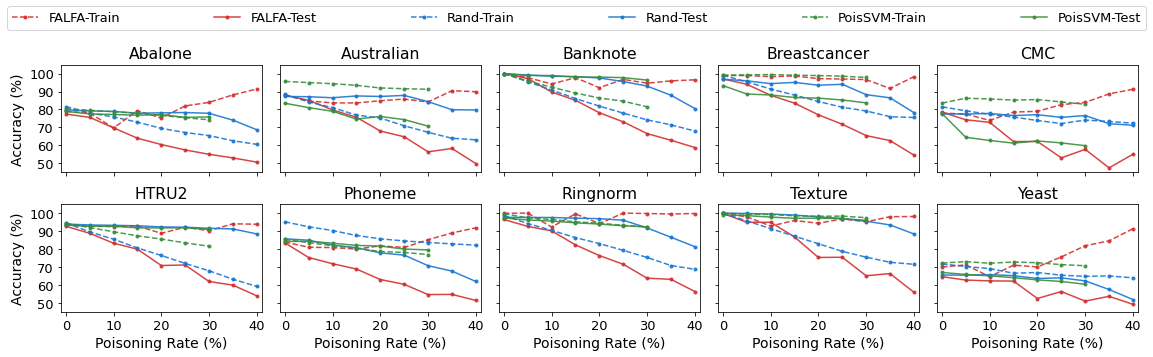

In [13]:
FONTSIZE = 13
FIGSIZE = (16, 4.5)

plt.rcParams["font.size"] = FONTSIZE
fig, axs = plt.subplots(2, 5, sharey=True, sharex=True, figsize=FIGSIZE)
_axs = []
for i in range(2):
    for j in range(5):
        _axs.append(axs[i, j])
for dataname, title, ax in zip(datanames, titlenames, _axs):
    dfs = [
        df_01[df_01['Data.Base'] == dataname],
        df_02[df_02['Data.Base'] == dataname],
        df_03[df_03['Data.Base'] == dataname],
    ]
    draw_subplot(dfs, title, ax)

plt.yticks(np.arange(50, 101, 10))
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
labels = [
    'FALFA-Train',
    'FALFA-Test',
    'Rand-Train',
    'Rand-Test',
    'PoisSVM-Train',
    'PoisSVM-Test',
]
fig.legend(lines, labels, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=6)
plt.tight_layout(pad=0.8)
path_fig_out = os.path.join(path_output, 'flfa_acc.pdf', )
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')